# Taylor models + NNs: Proof of concept

In [1]:
using TaylorModels

## Set-up

In [5]:
set_variables("x y", order=8)

2-element Array{TaylorN{Float64},1}:
  1.0 x + 𝒪(‖x‖⁹)
  1.0 y + 𝒪(‖x‖⁹)

In [2]:
x0 = IntervalBox(0..0, 2)

[0, 0] × [0, 0]

In [4]:
dom = IntervalBox(-0.25 .. 0.25, 2)

[-0.25, 0.25] × [-0.25, 0.25]

In [6]:
xm = TaylorModelN(1, 3, x0, dom)
ym = TaylorModelN(2, 3, x0, dom)
xm, ym

( [1, 1] x + [0, 0],  [1, 1] y + [0, 0])

## `relu`

In [18]:
relu(x) = x ≤ 0 ? zero(x) : x

relu (generic function with 1 method)

In [19]:
relu(1 .. 1), relu(-1 .. 0), relu(-1..1)

([1, 1], [0, 0], [-1, 1])

In [20]:
relu.((-1 .. 0.3) × (-1 .. 1))

[-1, 0.300001] × [-1, 1]

##  Naive implementation of TMs+NN

In [15]:
A = randn(6,2)
b = randn(6);

In [30]:
nnm = A*[xm,ym]+b

6-element Array{TaylorModelN{2,Interval{Float64},Float64},1}:
         [-1.19275, -1.19274] + [0.314856, 0.314857] x + [-1.30385, -1.30384] y + [0, 0]
        [-0.126922, -0.126921] + [0.718523, 0.718524] x + [0.652049, 0.65205] y + [0, 0]
      [0.513463, 0.513464] + [-0.257189, -0.257188] x + [0.0214069, 0.021407] y + [0, 0]
       [0.0523725, 0.0523726] + [0.331176, 0.331177] x + [-1.38012, -1.38011] y + [0, 0]
  [-0.925721, -0.92572] + [-0.947305, -0.947304] x + [-0.0630962, -0.0630961] y + [0, 0]
        [-0.548875, -0.548874] + [0.513005, 0.513006] x + [-2.3832, -2.38319] y + [0, 0]

In [31]:
range_nnm = evaluate(nnm, dom)

[-1.59743, -0.78807] × [-0.469565, 0.215722] × [0.443814, 0.583113] × [-0.375451, 0.480196] × [-1.17833, -0.67312] × [-1.27293, 0.175175]

In [32]:
relu.(range_nnm)

[0, 0] × [-0.469565, 0.215722] × [0.443814, 0.583113] × [-0.375451, 0.480196] × [0, 0] × [-1.27293, 0.175175]

In [22]:
function relu(x::TaylorModelN)
    dom = domain(x)
    range = evaluate(x, dom)
    @show(range)  # Show computed range, to check consistency
    relu(range) ≤ 0 && return (zero(x))
    return x # <<
end

relu (generic function with 2 methods)

In [34]:
relu.(nnm)

range = [-1.59743, -0.78807]
range = [-0.469565, 0.215722]
range = [0.443814, 0.583113]
range = [-0.375451, 0.480196]
range = [-1.17833, -0.67312]
range = [-1.27293, 0.175175]


6-element Array{TaylorModelN{2,Interval{Float64},Float64},1}:
                                                                     [0, 0] + [0, 0]
    [-0.126922, -0.126921] + [0.718523, 0.718524] x + [0.652049, 0.65205] y + [0, 0]
  [0.513463, 0.513464] + [-0.257189, -0.257188] x + [0.0214069, 0.021407] y + [0, 0]
   [0.0523725, 0.0523726] + [0.331176, 0.331177] x + [-1.38012, -1.38011] y + [0, 0]
                                                                     [0, 0] + [0, 0]
    [-0.548875, -0.548874] + [0.513005, 0.513006] x + [-2.3832, -2.38319] y + [0, 0]

## Same thing, with nonlinearities

In [35]:
nnm = A*[cos(xm),sin(ym)]+b

6-element Array{TaylorModelN{2,Interval{Float64},Float64},1}:
      [-0.87789, -0.877889] + [-1.30385, -1.30384] y + [-0.157429, -0.157428] x² + [0.217307, 0.217308] y³ + [-5.25028e-05, 0.000103643]
      [0.591601, 0.591602] + [0.652049, 0.65205] y + [-0.359262, -0.359261] x² + [-0.108675, -0.108674] y³ + [-2.62565e-05, 0.000142961]
  [0.256274, 0.256275] + [0.0214069, 0.021407] y + [0.128594, 0.128595] x² + [-0.00356784, -0.00356783] y³ + [-4.26351e-05, 8.62008e-07]
         [0.383548, 0.383549] + [-1.38012, -1.38011] y + [-0.165589, -0.165588] x² + [0.230019, 0.23002] y³ + [-5.5574e-05, 0.000109365]
    [-1.87303, -1.87302] + [-0.0630962, -0.0630961] y + [0.473652, 0.473653] x² + [0.010516, 0.0105161] y³ + [-0.000156404, 2.54073e-06]
    [-0.0358694, -0.0358693] + [-2.3832, -2.38319] y + [-0.256503, -0.256502] x² + [0.397198, 0.397199] y³ + [-9.59654e-05, 0.000179289]

In [36]:
relu.(nnm)

range = [-1.21714, -0.548428]
range = [0.404411, 0.756456]
range = [0.250824, 0.26972]
range = [0.024521, 0.732282]
range = [-1.88913, -1.82748]
range = [-0.654002, 0.566315]


6-element Array{TaylorModelN{2,Interval{Float64},Float64},1}:
                                                                                                                         [0, 0] + [0, 0]
      [0.591601, 0.591602] + [0.652049, 0.65205] y + [-0.359262, -0.359261] x² + [-0.108675, -0.108674] y³ + [-2.62565e-05, 0.000142961]
  [0.256274, 0.256275] + [0.0214069, 0.021407] y + [0.128594, 0.128595] x² + [-0.00356784, -0.00356783] y³ + [-4.26351e-05, 8.62008e-07]
         [0.383548, 0.383549] + [-1.38012, -1.38011] y + [-0.165589, -0.165588] x² + [0.230019, 0.23002] y³ + [-5.5574e-05, 0.000109365]
                                                                                                                         [0, 0] + [0, 0]
    [-0.0358694, -0.0358693] + [-2.3832, -2.38319] y + [-0.256503, -0.256502] x² + [0.397198, 0.397199] y³ + [-9.59654e-05, 0.000179289]

In [3]:
using ReachabilityAnalysis, Plots

In [4]:
Z = rand(Zonotope)

T = overapproximate(Z, TaylorModelReachSet)

TaylorModelReachSet{Float64}(TaylorModel1{TaylorN{Float64},Float64}[  0.7416970294694355 + 3.467329394961826 x₁ + 3.3043543152697543 x₂ + [0, 0],   - 0.06830039507963603 + 3.622970262020335 x₁ + 0.3723803564400032 x₂ + [0, 0]], [0, 0])

In [7]:
Z.center

2-element Array{Float64,1}:
  0.7416970294694355
 -0.06830039507963606

In [6]:
Z.generators

2×4 Array{Float64,2}:
 1.34724  0.958709  -0.00918946  -0.216365
 1.40771  0.108041   0.753063     1.19786

$F(x, t) = p_0(x) + p_1(x)t + p_2(x)t^2 +...+p_k(x)t^k$

In [5]:
set(T)

2-element Array{TaylorModel1{TaylorN{Float64},Float64},1}:
      0.7416970294694355 + 3.467329394961826 x₁ + 3.3043543152697543 x₂ + [0, 0]
   - 0.06830039507963603 + 3.622970262020335 x₁ + 0.3723803564400032 x₂ + [0, 0]

In [12]:
TZ = set(overapproximate(T, Zonotope));

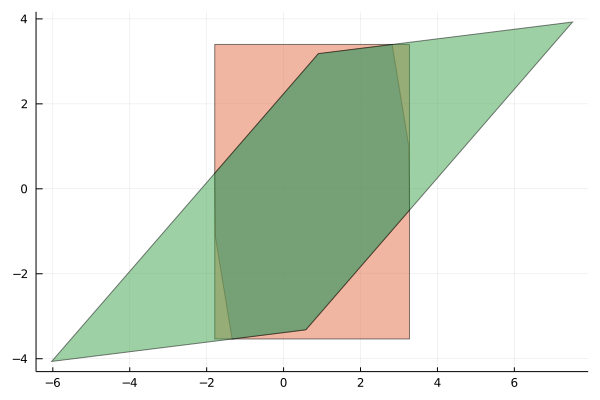

In [14]:
plot(Z)
plot!(box_approximation(Z))
plot!(TZ)

In [16]:
set(T)

2-element Array{TaylorModel1{TaylorN{Float64},Float64},1}:
      0.7416970294694355 + 3.467329394961826 x₁ + 3.3043543152697543 x₂ + [0, 0]
   - 0.06830039507963603 + 3.622970262020335 x₁ + 0.3723803564400032 x₂ + [0, 0]

In [38]:
function relu(x::TaylorModel1{<:TaylorN{N}}) where N
    t0 = 0.0 # dummy
    y = TaylorModels.evaluate(x, t0)
    n = get_numvars()
    range = TaylorModels.evaluate(y, ReachabilityAnalysis.symBox(n))
    
    # completely contained in <= 0
    relu(range) ≤ 0 && return interval(0.0)
    
    # otherwise intersect with > 0
    return range ∩ (0 .. Inf)
end

relu (generic function with 3 methods)

In [40]:
nnm = A*set(T) + b
relu.(nnm)

6-element Array{IntervalArithmetic.Interval{Float64},1}:
 [0, 10.1656]
 [0, 11.4565]
 [0, 10.3849]
  [0, 1.23601]
  [0, 3.99955]
 [0, 11.9988]

Trelu = convert(Hyperrectangle, IntervalBox(relu.(set(T)))) = Hyperrectangle{Float64,StaticArrays.SArray{Tuple{2},Float64,1,2},StaticArrays.SArray{Tuple{2},Float64,1,2}}([3.7566903698505083, 1.9635251116903512], [3.7566903698505083, 1.9635251116903512])


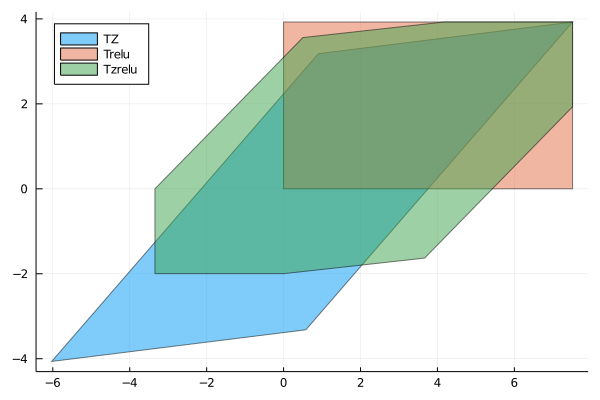

In [50]:
plot(TZ, lab="TZ")

@show Trelu = convert(Hyperrectangle, IntervalBox(relu.(set(T))))

TZrelu = overapproximate(Rectification(TZ), Zonotope) # uses AI2

plot!(Trelu, lab="Trelu", legend=:topleft)

plot!(TZrelu, lab="Tzrelu")

Another random example:

Trelu = convert(Hyperrectangle, IntervalBox(relu.(set(T)))) = Hyperrectangle{Float64,StaticArrays.SArray{Tuple{2},Float64,1,2},StaticArrays.SArray{Tuple{2},Float64,1,2}}([0.44083023623379786, 1.0129490299582236], [0.44083023623379786, 1.0129490299582236])


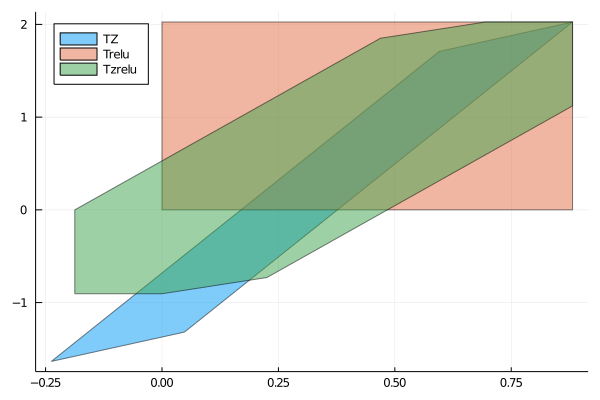

In [56]:
Z = rand(Zonotope, num_generators=2)

T = overapproximate(Z, TaylorModelReachSet)

TZ = set(overapproximate(T, Zonotope));

plot(TZ, lab="TZ")

@show Trelu = convert(Hyperrectangle, IntervalBox(relu.(set(T))))

TZrelu = overapproximate(Rectification(TZ), Zonotope) # uses AI2

plot!(Trelu, lab="Trelu", legend=:topleft)

plot!(TZrelu, lab="Tzrelu")

## Example with the TORA network

<<<